# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
sample_1=np.random.normal(loc=50, scale=5, size=10)
sample_2=np.random.normal(loc=50, scale=5, size=50)
sample_3=np.random.normal(loc=50, scale=5, size=500)
sample_4=np.random.normal(loc=50, scale=5, size=5000)

k1, p1 = stats.normaltest(sample_1)
k1, p2 = stats.normaltest(sample_2)
k1, p3 = stats.normaltest(sample_3)
k1, p4 = stats.normaltest(sample_4)


/Users/miriam/miniconda3/envs/analytics_env/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Interpret the normaltest results and make your observations.

In [3]:
#https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/

In [4]:
#null hypothesis: sample comes from a normal distribution

#A small p-value (typically ≤ 0.05) indicates strong evidence against 
#the null hypothesis, so you reject the null hypothesis.
#>>Sample doesn't come from a normal distribution<<

#A large p-value (> 0.05) indicates weak evidence against 
#the null hypothesis, so you fail to reject the null hypothesis.
#>>Sample comes from a normal distribution<<

print(p1) 

if p1 <= 0.05:
    print("Sample 1 doesn't come from a normal distribution")
else:
    print("Sample 1 comes from a normal distribution")

print(p2) 

if p2 <= 0.05:
    print("Sample 2 doesn't come from a normal distribution")
else:
    print("Sample 2 comes from a normal distribution")

print(p3) 

if p3 <= 0.05:
    print("Sample 3 doesn't come from a normal distribution")
else:
    print("Sample 3 comes from a normal distribution")
    
print(p4) 

if p4 <= 0.05:
    print("Sample 4 doesn't come from a normal distribution")
else:
    print("Sample 4 comes from a normal distribution")

0.8807325873719842
Sample 1 comes from a normal distribution
0.9202456300897
Sample 2 comes from a normal distribution
0.8223235544573568
Sample 3 comes from a normal distribution
0.5640668796107156
Sample 4 comes from a normal distribution


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

Text(0.5, 1.0, 'n=5000')

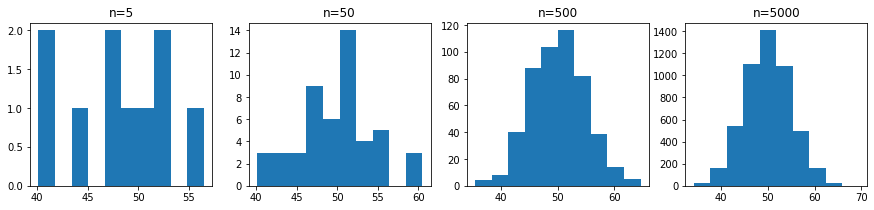

In [5]:
fig = plt.figure(figsize=(15,3)) #cm

ax1 = plt.subplot(141)
plt.hist(sample_1)
ax1.set_title('n=5')

ax2 = plt.subplot(142)
plt.hist(sample_2)
ax2.set_title('n=50')

ax3 = plt.subplot(143)
plt.hist(sample_3)
ax3.set_title('n=500')

ax4 = plt.subplot(144)
plt.hist(sample_4)
ax4.set_title('n=5000')



In [6]:
sample_1

array([46.81821158, 40.12586032, 51.97062974, 49.65584362, 45.01668531,
       50.66190526, 40.24546883, 47.70425054, 52.87502859, 56.46797741])

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [7]:
#https://statisticsbyjim.com/basics/central-limit-theorem/

The central limit theorem links the following two distributions:

- The **distribution of the variable** in the **population**.
- The **sampling distribution** of the mean.

CLT states that regardless of the variable’s distribution in the population, the sampling distribution of the mean will tend to approximate the normal distribution.

The shape of the sampling distribution changes with the sample size. And, the central limit theorem states that when you have a sufficiently large sample size, the sampling distribution starts to approximate a normal distribution. 

It depends on the shape of the variable’s distribution in the underlying population. The more the population distribution differs from being normal, the larger the sample size must be.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

<ipython-input-8-e826d3a7068b>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(data_binom)


<StemContainer object of 3 artists>

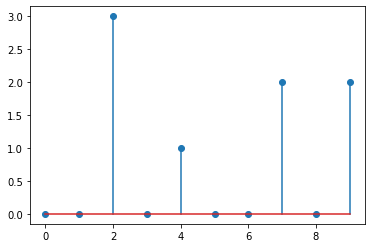

In [8]:
data_binom = stats.binom.rvs(n=5,p=0.15,size=10)
plt.stem(data_binom)

#### Explain what you observe from the plot above

In [9]:
#n: is the maximum number of successes
#p: probability of success
#size: number of experiments

#we have 10 experiments, and we success 3 times
#the 7th try is the one with more successes --> 2 

#### Now plot PMF with 50, 500, and 5000 visitors.

Text(0.5, 1.0, 'n=5000')

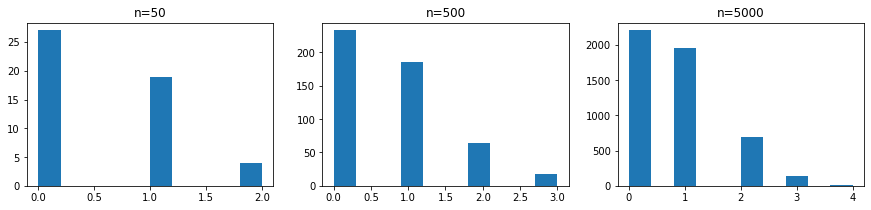

In [10]:
fig = plt.figure(figsize=(15,3)) #cm

ax1 = plt.subplot(131)
plt.hist(stats.binom.rvs(n=5,p=0.15,size=50))
#plt.stem(stats.binom.rvs(n=5,p=0.15,size=50))
ax1.set_title('n=50')

ax2 = plt.subplot(132)
plt.hist(stats.binom.rvs(n=5,p=0.15,size=500))
#plt.stem(stats.binom.rvs(n=5,p=0.15,size=500))
ax2.set_title('n=500')

ax3 = plt.subplot(133)
plt.hist(stats.binom.rvs(n=5,p=0.15,size=5000))
#plt.stem(stats.binom.rvs(n=5,p=0.15,size=5000))
ax3.set_title('n=5000')

#### What did you notice from the distribution plots? Comment your findings.

The higher the number of experiments:

- The most probable outcome is 0. 
- It makes sense because the probability of success is very low.
- The higher number of outliers

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

The Poisson distribution is useful for measuring how many events may occur during a given time horizon, such as the number of customers that enter a store during the next hour, the number of hits on a website during the next minute, and so forth. The Poisson process takes place over time instead of a series of trials; each interval of time is assumed to be independent of all other intervals.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [11]:
#mu: average number of events that occur in the time period
#k: number of events whose probability we are calculating
#loc=mean?? (Question for TA)
stats.poisson.pmf(k=320, mu=300, loc=0)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [12]:
stats.poisson.pmf(k=60, mu=300, loc=0)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

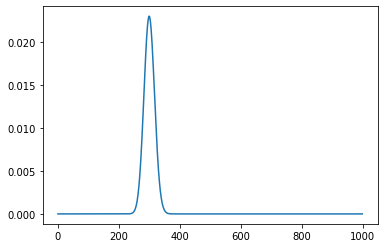

In [13]:
plt.plot(stats.poisson.pmf(k=range(1000), mu=300, loc=0))